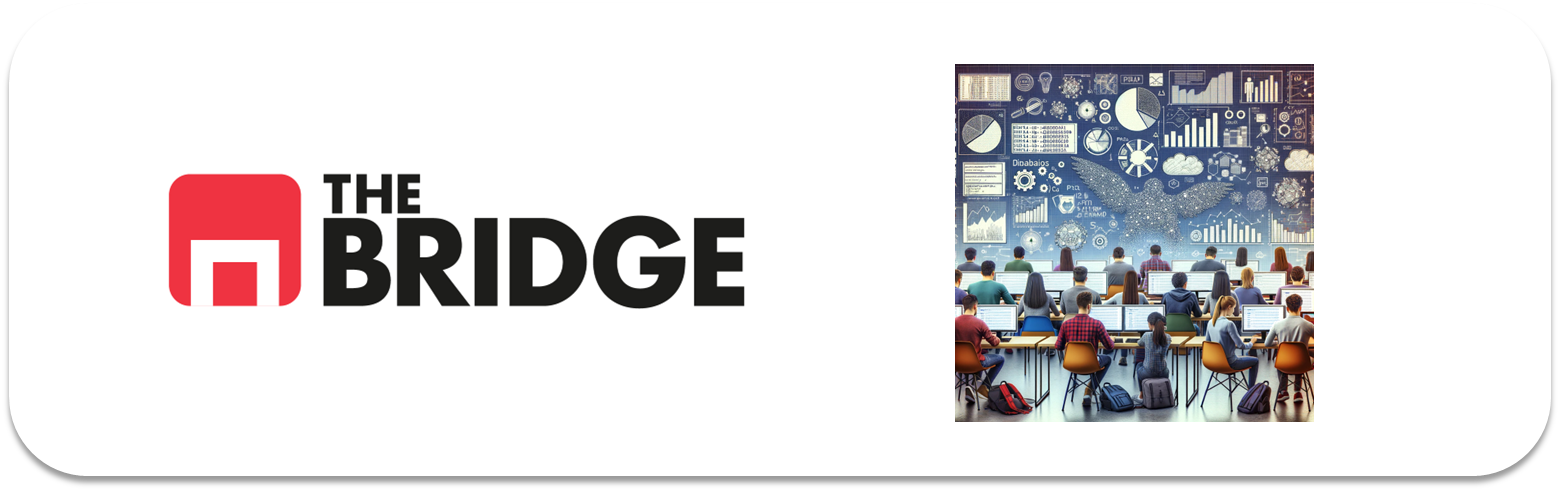

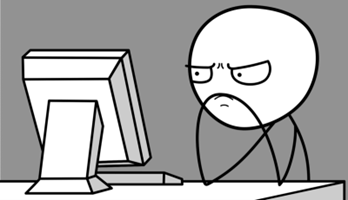

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms
from sklearn.model_selection import train_test_split


### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [3]:
df_advertising=pd.read_csv("./data/advertising_ml.csv")
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [4]:
df_advertising

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30 years,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45 años,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51 years,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19 years,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [5]:
#convertir Age a numerica
df_advertising["Age"] = (
    df_advertising["Age"]
    .str.replace(" years", "", regex=False).str.replace(" años","",regex=False)
    .astype(int)
)

In [6]:
#convertir timestamp a datetime
df_advertising["Timestamp"] = pd.to_datetime(df_advertising["Timestamp"])
df_advertising["Hour"] = df_advertising["Timestamp"].dt.hour  #creo columna hora
df_advertising["Weekday"] = df_advertising["Timestamp"].dt.weekday #creo columna dia de la semana

In [7]:
df_advertising

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,21,3
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2,4
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,17,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2,3


In [8]:
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Hour                      1000 non-null   int32         
 11  Weekday                   1000 non-null   int32         
dtypes: datetime64[ns](1),

### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

**La variable target es "Clicked on Ad". Aprendizaje supervisado. Tipo de problema: clasificacion binaria. Objetivo:Predecir si el usuario hara click en un anuncio**

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [9]:
lista_de_columnas=df_advertising.columns
lista_de_columnas

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Hour', 'Weekday'],
      dtype='object')

In [10]:
for columna in lista_de_columnas:
    cardinalidades=[]
    cardinalidad=len(df_advertising[columna].nunique()/df_advertising[columna].value_counts() *100)
    print(f"La cardinalidad de {columna} es igual a {cardinalidad}")
  


La cardinalidad de Daily Time Spent on Site es igual a 900
La cardinalidad de Age es igual a 43
La cardinalidad de Area Income es igual a 1000
La cardinalidad de Daily Internet Usage es igual a 966
La cardinalidad de Ad Topic Line es igual a 1000
La cardinalidad de City es igual a 969
La cardinalidad de Male es igual a 2
La cardinalidad de Country es igual a 237
La cardinalidad de Timestamp es igual a 1000
La cardinalidad de Clicked on Ad es igual a 2
La cardinalidad de Hour es igual a 24
La cardinalidad de Weekday es igual a 7


In [11]:
card = df_advertising.nunique()
clasificacion = {}

for col in df_advertising.columns:
    if df_advertising[col].dtype == "object":
        clasificacion[col] = "categorica"
    elif card[col] <= 20:
        clasificacion[col] = "categorica"
    else:
        clasificacion[col] = "numerica"

df_clas = pd.DataFrame({
    "columna": df_advertising.columns,
    "cardinalidad": df_advertising.nunique().values,
    "tipo": [clasificacion[col] for col in df_advertising.columns]
})

df_clas

        


,columna,cardinalidad,tipo
0,Daily Time Spent on Site,900,numerica
1,Age,43,numerica
2,Area Income,1000,numerica
3,Daily Internet Usage,966,numerica
4,Ad Topic Line,1000,categorica
5,City,969,categorica
6,Male,2,categorica
7,Country,237,categorica
8,Timestamp,1000,numerica
9,Clicked on Ad,2,categorica


In [13]:
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Hour                      1000 non-null   int32         
 11  Weekday                   1000 non-null   int32         
dtypes: datetime64[ns](1),

### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [15]:
df_advertising.Country.value_counts()

Country
Czech Republic      9
France              9
Senegal             8
Peru                8
Greece              8
                   ..
Kiribati            1
Marshall Islands    1
Bermuda             1
Mozambique          1
Lesotho             1
Name: count, Length: 237, dtype: int64

In [19]:
#df_advertising = df_advertising.drop(columns=["Ad Topic Line"]) Limpio columnas con alta cardinalidad y categóricas
df_advertising = df_advertising.drop(columns=["City"])
df_advertising = df_advertising.drop(columns=["Country"])

In [22]:
df_advertising

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Hour,Weekday
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0,6
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,20,6
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,2,6
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,3,4
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,2016-02-11 21:49:00,1,21,3
996,51.30,45,67782.17,134.42,1,2016-04-22 02:07:01,1,2,4
997,51.63,51,42415.72,120.37,1,2016-02-01 17:24:57,1,17,0
998,55.55,19,41920.79,187.95,0,2016-03-24 02:35:54,0,2,3


In [23]:
#timestamp la desgloso para mejor aprovechamiento en meses y dias de semana
df_advertising["Month"] = df_advertising["Timestamp"].dt.month
df_advertising["Day"] = df_advertising["Timestamp"].dt.day
df_advertising["Is_Weekend"] = df_advertising["Weekday"].isin(["Saturday", "Sunday"]).astype(int)

df_advertising = df_advertising.drop(columns=["Timestamp"])

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [26]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(df_advertising, test_size=0.2,random_state=42)

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

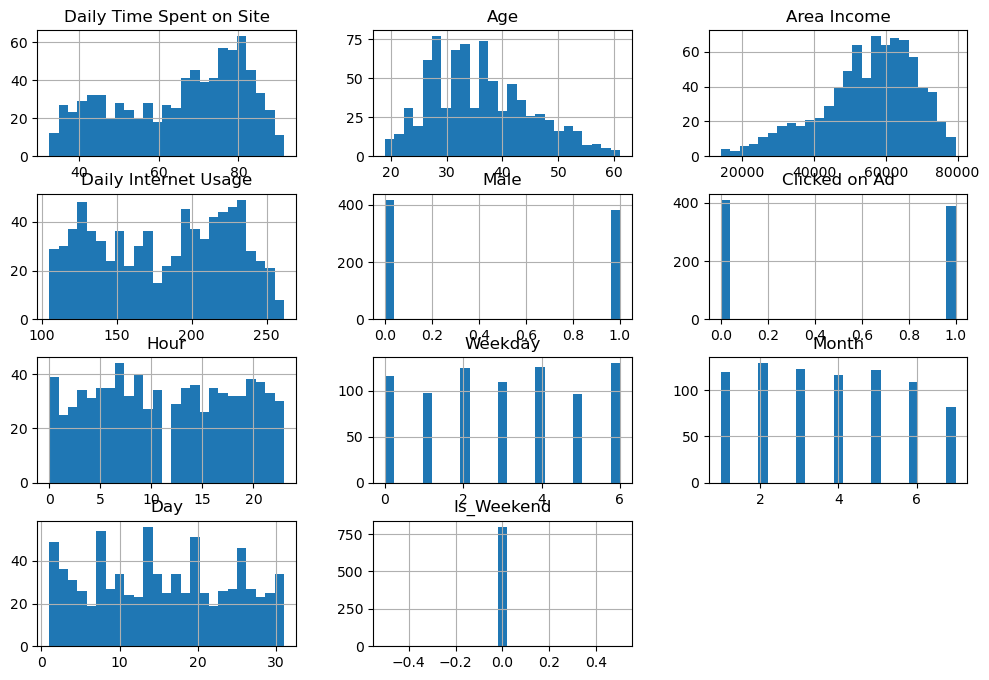

In [27]:
train_set.hist(bins=25,figsize=(12,8))
plt.show()

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

In [28]:
train_set

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Weekday,Month,Day,Is_Weekend
29,76.02,22,46179.97,209.82,0,0,12,2,1,27,0
535,78.76,32,70012.83,208.02,1,0,10,2,4,20,0
695,73.49,38,67132.46,244.23,0,0,11,6,2,14,0
557,79.67,28,58576.12,226.79,0,0,1,2,7,20,0
836,49.21,46,49206.40,115.60,0,1,3,6,2,28,0
...,...,...,...,...,...,...,...,...,...,...,...
106,72.23,25,46557.92,241.03,1,0,17,1,7,5,0
270,44.49,53,63100.13,168.00,1,1,6,5,4,23,0
860,91.37,45,51920.49,182.65,1,1,7,4,4,1,0
435,56.66,42,72684.44,139.42,0,1,10,5,2,20,0


In [33]:
columnas=["Age",'Daily Time Spent on Site','Area Income','Daily Internet Usage', 'Male', 'Clicked on Ad', 'Hour', 'Weekday',"Month","Day", "Is_Weekend"]

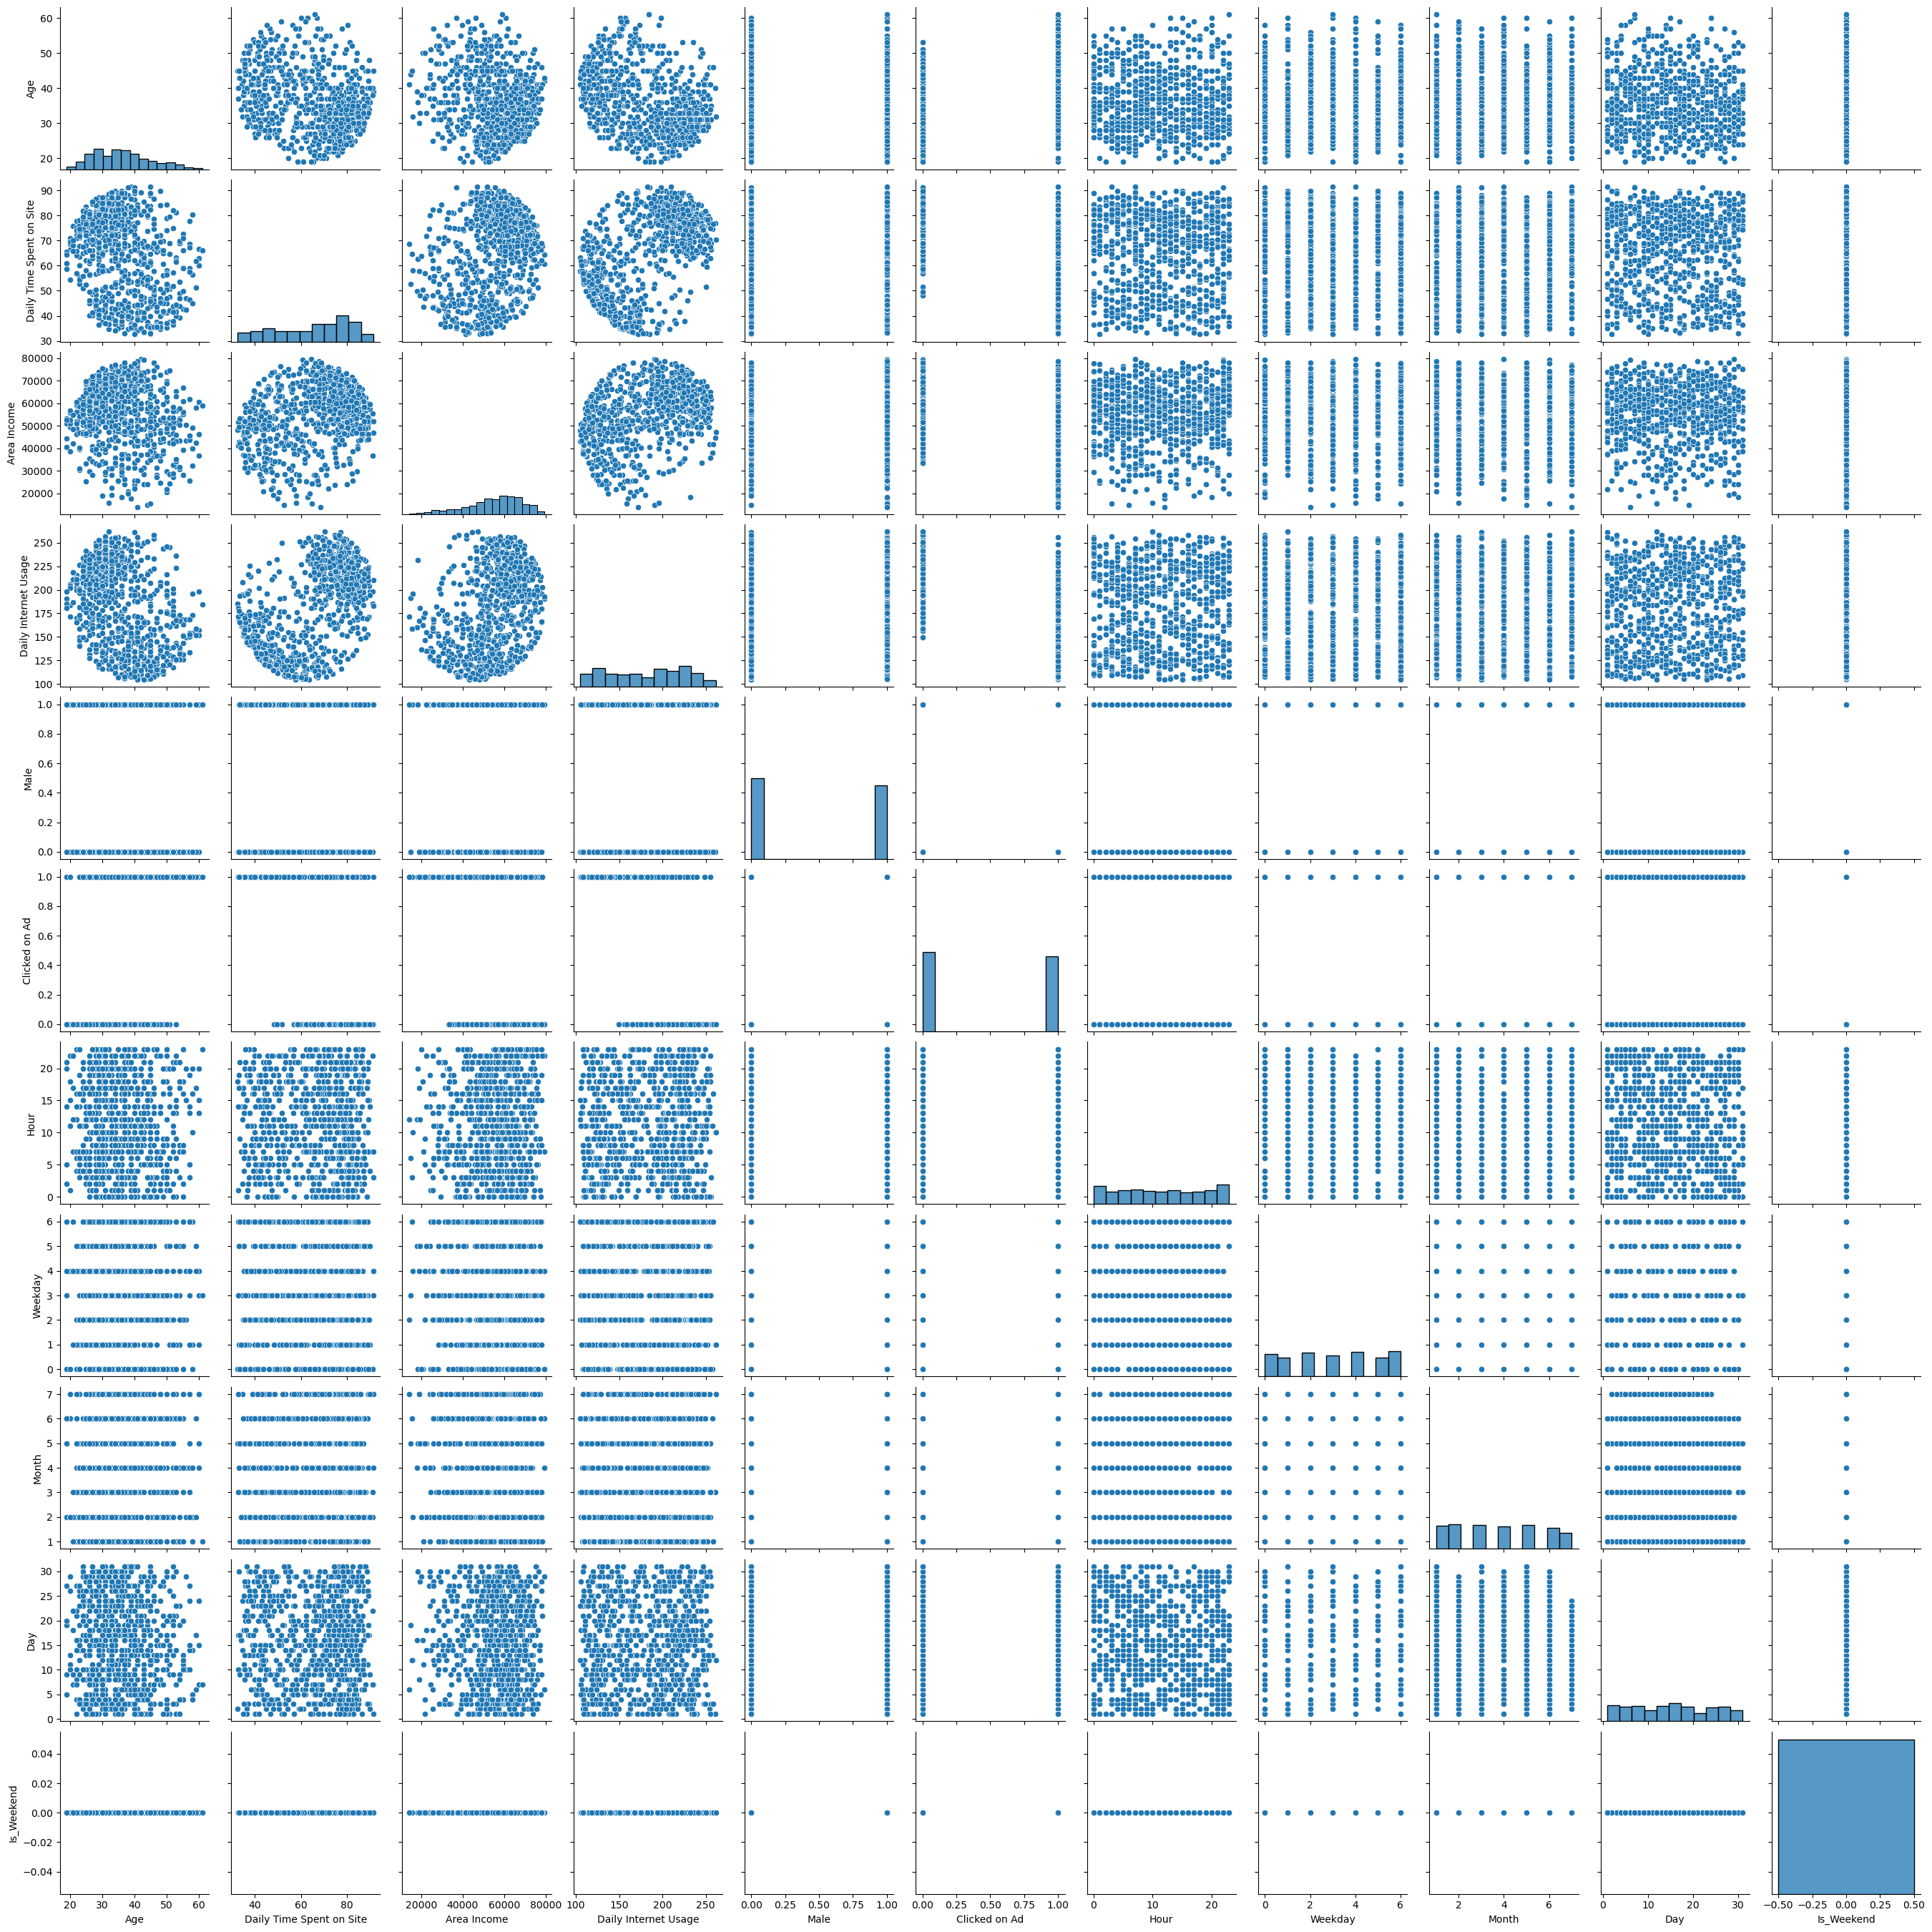

In [34]:
sns.pairplot(train_set[columnas])

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

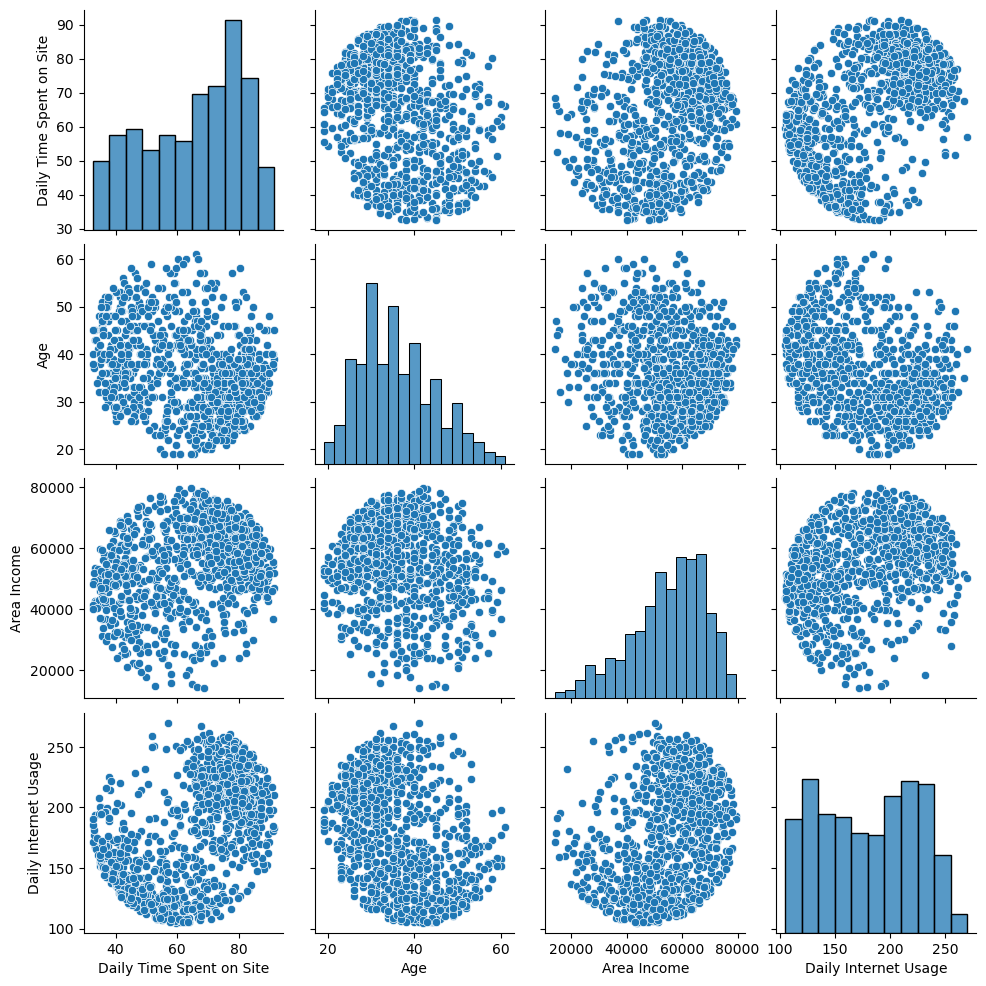

In [35]:
vars_interes = [
    "Daily Time Spent on Site",
    "Age",
    "Area Income",
    "Daily Internet Usage"
]

sns.pairplot(df_advertising[vars_interes])





